In [4]:
!head -n 3 /Users/wenjing/Desktop/qa_Beauty.json


{'questionType': 'yes/no', 'asin': '602260074X', 'answerTime': '10 days ago', 'question': 'can you fit make up brushes in the trays', 'answerType': 'Y', 'answer': 'yes it comes with adjustable dividers, you can place the dividers wherever you like..customize your makeup kit however you like it. i have my Mac brushes and eyeshadows on the top shelves and my Mac foundation bottles on the bottom'}
{'questionType': 'yes/no', 'asin': '602260074X', 'answerTime': 'Mar 3, 2015', 'unixTime': 1425369600, 'question': 'Can you move all the dividers?', 'answerType': '?', 'answer': 'yes,all the provided dividers are adjustable'}
{'questionType': 'yes/no', 'asin': '602260074X', 'answerTime': 'Dec 30, 2014', 'unixTime': 1419926400, 'question': 'is the surface in side the smooth?', 'answerType': 'Y', 'answer': 'Yes'}


## 1. EDA on Amazon Q&A

✅ Successfully loaded 42422 records.

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42422 entries, 0 to 42421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   questionType  42422 non-null  object 
 1   asin          42422 non-null  object 
 2   answerTime    42422 non-null  object 
 3   question      42422 non-null  object 
 4   answerType    18091 non-null  object 
 5   answer        42422 non-null  object 
 6   unixTime      40790 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.3+ MB
None

=== Sample Rows ===
  questionType        asin    answerTime  \
0       yes/no  602260074X   10 days ago   
1       yes/no  602260074X   Mar 3, 2015   
2       yes/no  602260074X  Dec 30, 2014   

                                   question answerType  \
0  can you fit make up brushes in the trays          Y   
1            Can you move all the dividers?          ?   
2        is the

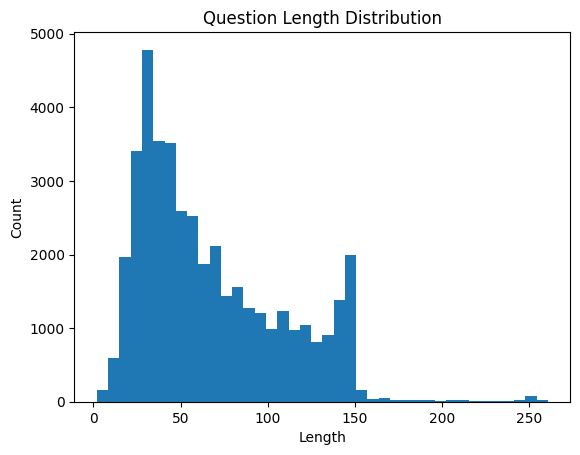


📏 Average question length: 67.6 characters

=== Answer Type Distribution ===
answerType
?    9504
Y    5777
N    2810
Name: count, dtype: int64

=== Question Type Distribution ===
questionType
open-ended    24331
yes/no        18091
Name: count, dtype: int64


In [ ]:
"""
Read and Explore qa_Beauty.json (Python dict-style JSONL)
"""

import ast
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# === Step 1: File path ===
file_path = Path("/Users/wenjing/Desktop/qa_Beauty.json")

# === Step 2: Parse file line by line ===
data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            # Safely evaluate Python dict-like string
            obj = ast.literal_eval(line)
            data.append(obj)
        except Exception as e:
            print("⚠️ Skipping line due to parse error:", e)
            continue

df = pd.DataFrame(data)
print(f"✅ Successfully loaded {len(df)} records.")

# === Step 3: Basic info ===
print("\n=== DataFrame Info ===")
print(df.info())

print("\n=== Sample Rows ===")
print(df.head(3))

# === Step 4: Missing value summary ===
print("\n=== Missing Values ===")
print(df.isnull().sum())

# === Step 5: Column overview ===
print("\n=== Column Names ===")
print(df.columns.tolist())

# === Step 6: Basic descriptive stats ===
print("\n=== Descriptive Stats (for numeric/time columns) ===")
print(df.describe(include='all').transpose().head(10))

# === Step 7: Question length distribution ===
if "question" in df.columns:
    df["q_len"] = df["question"].astype(str).apply(len)
    plt.hist(df["q_len"], bins=40)
    plt.title("Question Length Distribution")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.show()
    print(f"\n📏 Average question length: {df['q_len'].mean():.1f} characters")

# === Step 8: Answer Type distribution ===
if "answerType" in df.columns:
    print("\n=== Answer Type Distribution ===")
    print(df["answerType"].value_counts())

# === Step 9: Question Type distribution ===
if "questionType" in df.columns:
    print("\n=== Question Type Distribution ===")
    print(df["questionType"].value_counts())


✅ Successfully loaded 42422 records.

📋 Columns: ['questionType', 'asin', 'answerTime', 'question', 'answerType', 'answer', 'unixTime']
  questionType        asin    answerTime  \
0       yes/no  602260074X   10 days ago   
1       yes/no  602260074X   Mar 3, 2015   
2       yes/no  602260074X  Dec 30, 2014   

                                   question answerType  \
0  can you fit make up brushes in the trays          Y   
1            Can you move all the dividers?          ?   
2        is the surface in side the smooth?          Y   

                                              answer      unixTime  
0  yes it comes with adjustable dividers, you can...           NaN  
1       yes,all the provided dividers are adjustable  1.425370e+09  
2                                                Yes  1.419926e+09  

📊 Unique Question Types:
questionType
open-ended    24331
yes/no        18091
Name: count, dtype: int64

📊 Unique Answer Types:
answerType
NaN    24331
?       9504
Y       5777

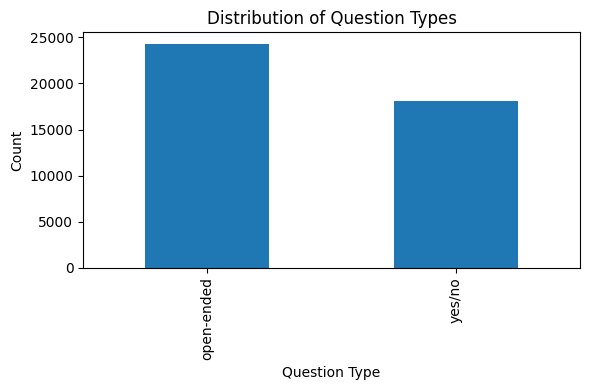

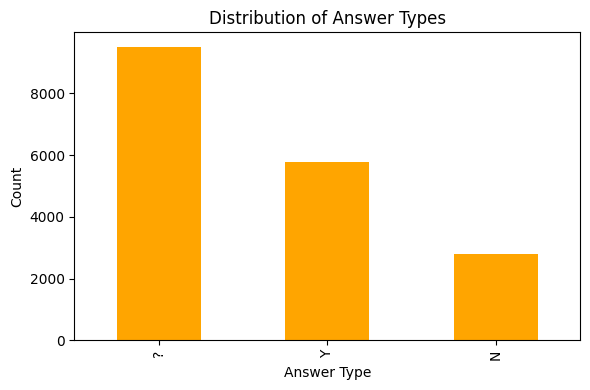

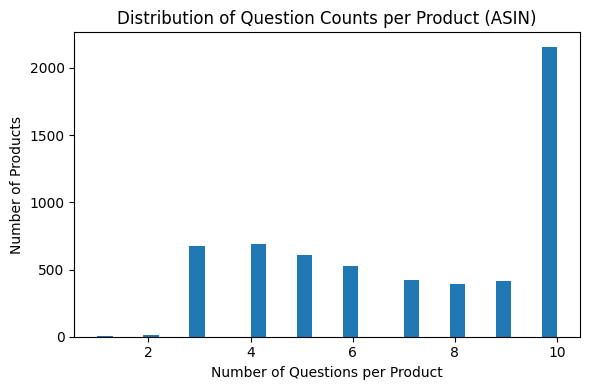

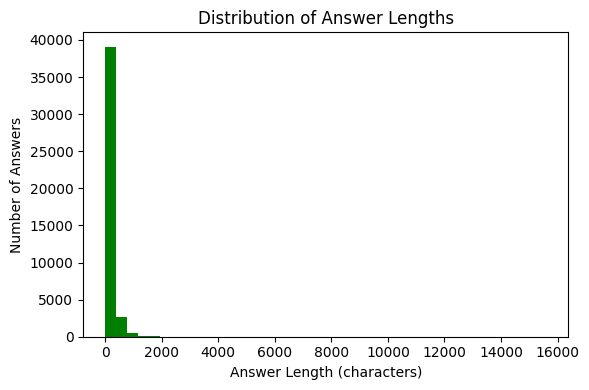


✅ EDA and visualization completed successfully.


In [7]:
# -*- coding: utf-8 -*-
"""
EDA for qa_Beauty.json — includes questionType, answerType, asin grouping, and answer length analysis
"""

import ast
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# === Step 1: Load JSON-like data ===
file_path = Path("/Users/wenjing/Desktop/qa_Beauty.json")

data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            obj = ast.literal_eval(line)  # safely evaluate dict-like strings
            data.append(obj)
        except Exception as e:
            print("⚠️ Skipping line due to error:", e)
            continue

df = pd.DataFrame(data)
print(f"✅ Successfully loaded {len(df)} records.")
print("=" * 70)

# === Step 2: Basic sanity checks ===
print("\n📋 Columns:", df.columns.tolist())
print(df.head(3))

# === Step 3: Question Type and Answer Type distributions ===
print("\n📊 Unique Question Types:")
print(df["questionType"].value_counts(dropna=False))

print("\n📊 Unique Answer Types:")
print(df["answerType"].value_counts(dropna=False))

# === Step 4: Group by ASIN (Product ID) ===
asin_stats = df.groupby("asin").size().reset_index(name="question_count")
asin_stats = asin_stats.sort_values("question_count", ascending=False)

print("\n🏷️ Top 10 Products with Most Questions:")
print(asin_stats.head(10))

print("\n📈 Question Count Distribution per Product:")
print(asin_stats["question_count"].describe())

# === Step 5: Answer Length Analysis ===
df["answer_length"] = df["answer"].astype(str).apply(len)

print("\n✏️ Answer Length Stats:")
print(df["answer_length"].describe())

print("\n🔢 Shortest Answers:")
print(df.loc[df["answer_length"] < 10, ["asin", "question", "answer"]].head())

print("\n🔢 Longest Answers:")
print(df.loc[df["answer_length"] > 200, ["asin", "question", "answer"]].head())

# === Step 6: Visualizations ===
plt.figure(figsize=(6,4))
df["questionType"].value_counts().plot(kind="bar")
plt.title("Distribution of Question Types")
plt.xlabel("Question Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
df["answerType"].value_counts().plot(kind="bar", color="orange")
plt.title("Distribution of Answer Types")
plt.xlabel("Answer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(asin_stats["question_count"], bins=30)
plt.title("Distribution of Question Counts per Product (ASIN)")
plt.xlabel("Number of Questions per Product")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["answer_length"], bins=40, color="green")
plt.title("Distribution of Answer Lengths")
plt.xlabel("Answer Length (characters)")
plt.ylabel("Number of Answers")
plt.tight_layout()
plt.show()

print("\n✅ EDA and visualization completed successfully.")


✅ Successfully loaded 42422 records.

✏️ Answer Length Stats (Overall):
count    42422.000000
mean       159.445877
std        277.212082
min          0.000000
25%         45.000000
50%        102.000000
75%        201.000000
max      15600.000000
Name: answer_length, dtype: float64

🏷️ Top 10 Products with Longest Average Answers:
            asin  question_count  avg_answer_length  median_answer_length
558   B000EN7NH6               7        2298.714286                  51.0
1307  B00119OW76               7        2298.714286                  51.0
555   B000EN3IIE               7        2298.714286                  51.0
168   B00021DTEG               7        2298.714286                  51.0
169   B00021DTJG               7        2298.714286                  51.0
170   B00021DTZK               7        2298.714286                  51.0
2749  B003E8CGH0               7        2298.714286                  51.0
361   B0009R35CE               3         976.666667                 953.0


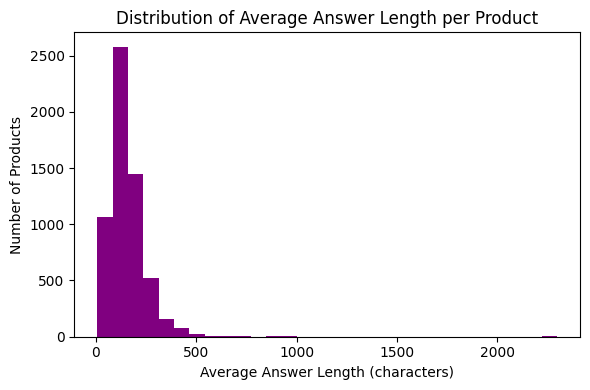


✅ Finished computing average answer lengths per product.


In [8]:
# -*- coding: utf-8 -*-
"""
EDA for qa_Beauty.json — includes avg answer length per product
"""

import ast
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# === Step 1: Load JSON-like data ===
file_path = Path("/Users/wenjing/Desktop/qa_Beauty.json")

data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            obj = ast.literal_eval(line)  # safely evaluate string dicts
            data.append(obj)
        except Exception as e:
            print("⚠️ Skipping line due to error:", e)
            continue

df = pd.DataFrame(data)
print(f"✅ Successfully loaded {len(df)} records.")
print("=" * 70)

# === Step 2: Compute answer length ===
df["answer_length"] = df["answer"].astype(str).apply(len)

print("\n✏️ Answer Length Stats (Overall):")
print(df["answer_length"].describe())

# === Step 3: Average answer length per ASIN ===
asin_stats = (
    df.groupby("asin")
    .agg(
        question_count=("question", "count"),
        avg_answer_length=("answer_length", "mean"),
        median_answer_length=("answer_length", "median"),
    )
    .reset_index()
)

asin_stats = asin_stats.sort_values("avg_answer_length", ascending=False)
print("\n🏷️ Top 10 Products with Longest Average Answers:")
print(asin_stats.head(10))

print("\n📈 Average Answer Length Distribution:")
print(asin_stats["avg_answer_length"].describe())

# === Step 4: Visualizations ===
plt.figure(figsize=(6,4))
plt.hist(asin_stats["avg_answer_length"], bins=30, color="purple")
plt.title("Distribution of Average Answer Length per Product")
plt.xlabel("Average Answer Length (characters)")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

print("\n✅ Finished computing average answer lengths per product.")


## 2. EDA on Amazon Reviews

In [9]:
file_path = "/Users/wenjing/Desktop/4213 project/dataset/All_Beauty.jsonl"

data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

Loaded rows: 701528
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7

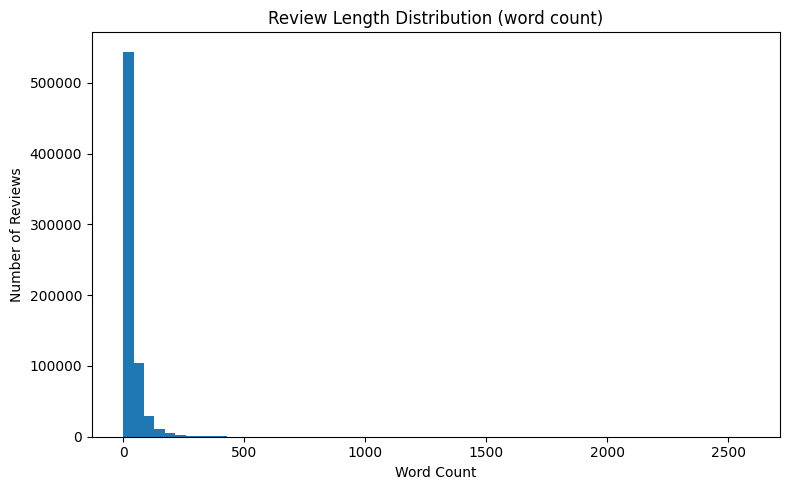


Top 20 products by review count:
parent_asin
B085BB7B1M    1962
B0BM4GX6TT    1750
B07C533XCW    1513
B09X9BG4FC    1374
B00R1TAN7I    1372
B08L5KN7X4    1343
B019GBG0IE    1328
B01M1OFZOG    1243
B0C9CWKY9G    1153
B0107QYW14    1112
B01N4885PD    1037
B09C2ZW2GL     959
B00J7QCNDU     934
B07TK15BQQ     920
B09LHS6RGF     881
B012Q9NGE4     861
B07ZJKVVLW     841
B005BZQHEC     785
B074KD4PX2     782
B08B1PR9C7     756
Name: count, dtype: int64


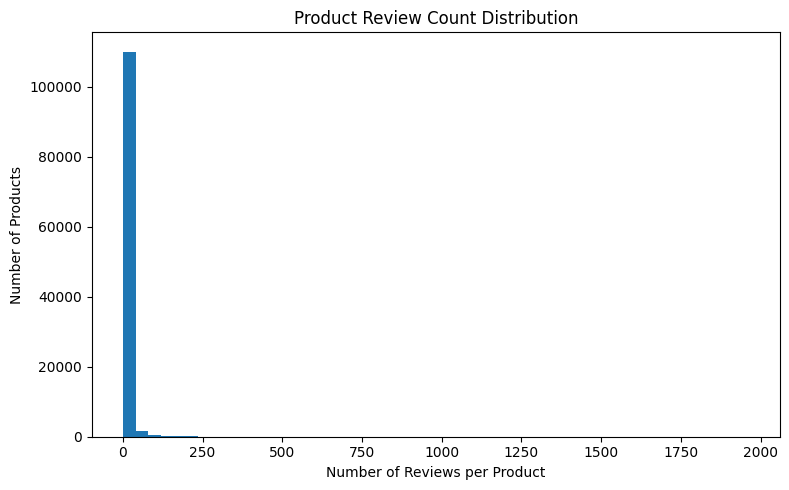


User Review Count Stats:
count    631986.000000
mean          1.110037
std           0.753202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: count, dtype: float64


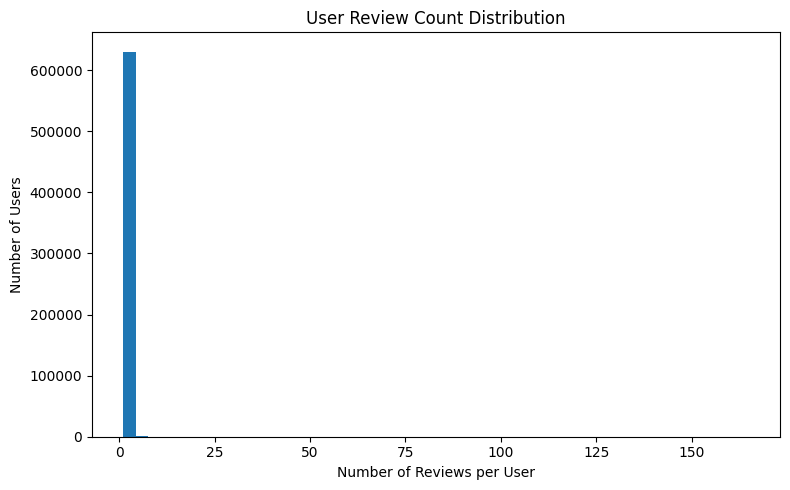

In [11]:
# ======================================================
# EDA for Amazon Beauty Reviews (Your Data Structure)
# ======================================================

import json
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load your JSONL file
# -----------------------------
file_path = "/Users/wenjing/Desktop/4213 project/dataset/All_Beauty.jsonl"

data = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

print("Loaded rows:", len(df))
print(df.head())


# ======================================================
# 1. Basic counts
# ======================================================

product_count = df["parent_asin"].nunique()
user_count = df["user_id"].nunique()

print("\n=== Basic Counts ===")
print("Unique products:", product_count)
print("Unique users:", user_count)


# ======================================================
# 2. Review length distribution
# ======================================================

df["text"] = df["text"].fillna("")
df["review_length"] = df["text"].apply(lambda x: len(str(x).split()))

print("\n=== Review Length Stats ===")
print(df["review_length"].describe())

plt.figure(figsize=(8,5))
plt.hist(df["review_length"], bins=60)
plt.title("Review Length Distribution (word count)")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


# ======================================================
# 3. Product review count distribution
# ======================================================

product_review_count = df["parent_asin"].value_counts()

print("\nTop 20 products by review count:")
print(product_review_count.head(20))

plt.figure(figsize=(8,5))
plt.hist(product_review_count, bins=50)
plt.title("Product Review Count Distribution")
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


# ======================================================
# 4. User review count distribution
# ======================================================

user_review_count = df["user_id"].value_counts()

print("\nUser Review Count Stats:")
print(user_review_count.describe())

plt.figure(figsize=(8,5))
plt.hist(user_review_count, bins=50)
plt.title("User Review Count Distribution")
plt.xlabel("Number of Reviews per User")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()
